In [142]:
import pandas as pd
import numpy as np
import statistics as st
file=pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
file.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [145]:
def data_clean(f):
    if f.columns.isin(['Unnamed: 0']).sum()!=0:
        f=f.drop('Unnamed: 0', axis=1)
    cname=f.columns
    for x in cname:
        if f[x].isna().sum()!=0:
            if f[x].dtype=='object':
                # fills NaNs of the object.list with the mode of the list 
                f[x]=f[x].fillna(st.mode(f[x]))
            
            else:
                # fills NaNs of the number.list with mean of the list 
                f[x]=f[x].fillna(np.mean(f[x]))
                
                f[f[x].isna()==True][x]=[f[x].mean()]*f[x].isna().sum()

    return f


In [148]:
#print(file.head())
file=data_clean(file)
#date_time_task
file['Effective To Date']=pd.to_datetime(file['Effective To Date'], errors='coerce')
file['Month']=file['Effective To Date'].apply(lambda x: x.month)
print(file['Month'].value_counts())
#All dates are from the 1. Quarter of the year
file.to_csv('csv_files/marketing_customer_analysis1.csv',index=False)

1    5818
2    5092
Name: Month, dtype: int64


In [81]:
file=pd.read_csv('csv_files/marketing_customer_analysis1.csv')
file.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,A,2


In [82]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


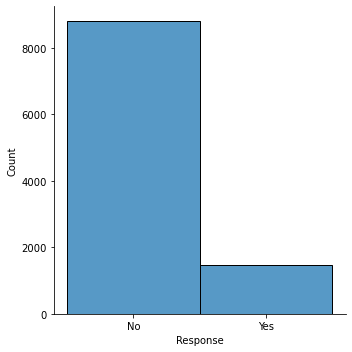

In [124]:
sns.displot(file['Response'])
plt.show()

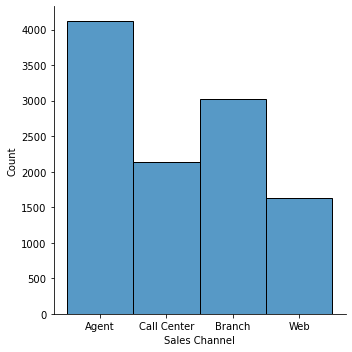

In [130]:
sns.displot(file['Sales Channel'])
plt.show()

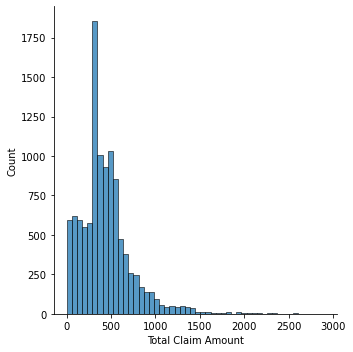

In [120]:
sns.displot(file['Total Claim Amount'], bins=50)
plt.show()